In [49]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os
import csv
# EDS_files = [
# 'cora_sampling_method=EDS_K_sparsity=100_results.p',
# 'cora_sampling_method=EDS_K_sparsity=10_results.p',
# 'cora_sampling_method=EDS_K_sparsity=5_results.p' ]



Greedy_files = [

'citeseer_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=0.01_results.p',
'citeseer_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=100_results.p',
'citeseer_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=1_results.p',
'citeseer_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=0.01_results.p',
'citeseer_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=100_results.p',
'citeseer_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=1_results.p',
'citeseer_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=0.01_results.p',
'citeseer_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=100_results.p',
'citeseer_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=1_results.p']

max_files = ['citeseer_sampling_method=MaxDegree_maxdegree_results.p']

random_file = ['citeseer_sampling_method=Random_random_results.p']


In [50]:
def open_files(files):
    file_content = []
    for file in  files:
        try:
            with open(file, 'rb') as f:
                file_content.append(pk.load(f, encoding='latin1'))
        except Exception as e:
            print(e)
            print("No " + file)
    return file_content
            
# eds_results = open_files(EDS_files)
geedy_results = open_files(Greedy_files)
max_results = open_files(max_files)
random_results = open_files(random_file)



In [52]:
def results_to_lines(results,sampling_title):
    lines = []
    for result in results:
        line = result['results']
        x = []
        y = []
        var = []
        for point in line:
            x.append(point[1])
            y.append(point[2])
            var.append(point[3])
        lines.append((x,y,var,result['info']))
        
        csvData = [[point[1],point[2],point[3]]for point in line ]
        file_name = sampling_title +"_"+ result['info']['params']['params']['dataset']
        if 'K_sparsity' in result['info']:
            file_name = file_name+"_"+str(result['info']['K_sparsity'])
        if 'noise' in result['info']:
            file_name = file_name+"_"+str(result['info']['noise'])
        file_name+=".csv"
        print(file_name)
        with open(file_name, 'w') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerows(csvData)
        csvFile.close()
    return lines

random_ref_line = results_to_lines(random_results, "Random")[0]

def plot(title, save_file,lines, label_name = None):
    plt.errorbar(random_ref_line[0],random_ref_line[1],yerr=random_ref_line[2],alpha = 0.7,color = 'r',label="Random sampling",fmt='o-')
    for line in lines:
        if label_name is not None:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,label=label_name+":"+str(line[3][label_name]),fmt='o-')
        else:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,fmt='o-')
    
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig(os.path.join('../report_citeseer',save_file), bbox_inches="tight", dpi = 300)



Random_citeseer.csv


In [54]:
#plot("EDS sampling","EDS_sampling_K_100.jpg",results_to_lines(eds_results)[0:1],'K_sparsity')

#results_to_lines(geedy_results,"Greedy")

In [55]:
plot("EDS sampling","EDS_sampling_K10.jpg",results_to_lines(eds_results)[1:2],'K_sparsity')


NameError: name 'eds_results' is not defined

In [56]:
plot("EDS sampling","EDS_sampling_K5.jpg",results_to_lines(eds_results)[2:3],'K_sparsity')

NameError: name 'eds_results' is not defined

Greedy_citeseer_100_0.01.csv
Greedy_citeseer_100_100.csv
Greedy_citeseer_100_1.csv


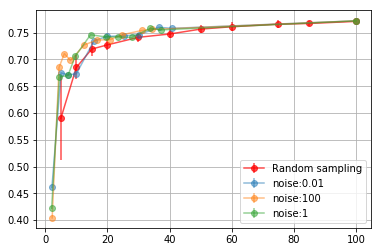

In [60]:
plot("Greedy sampling, K sparsity = 100 ","Greedy_K100_sampling.jpg",results_to_lines(geedy_results[0:3],"Greedy"),'noise')


Greedy_citeseer_10_0.01.csv
Greedy_citeseer_10_100.csv
Greedy_citeseer_10_1.csv


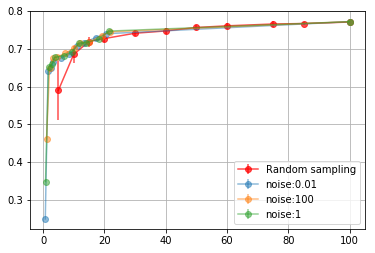

In [59]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling.jpg",results_to_lines(geedy_results[3:6],"Greedy"),'noise')


Greedy_citeseer_5_0.01.csv
Greedy_citeseer_5_100.csv
Greedy_citeseer_5_1.csv


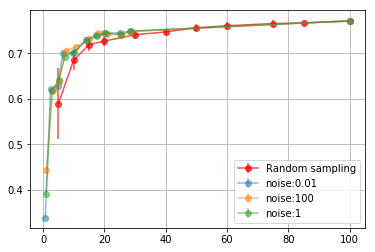

In [58]:
plot("Greedy sampling, K sparsity = 5 ","Greedy_K5_sampling.jpg",results_to_lines(geedy_results[6:9],"Greedy"),'noise')

Max_citeseer.csv


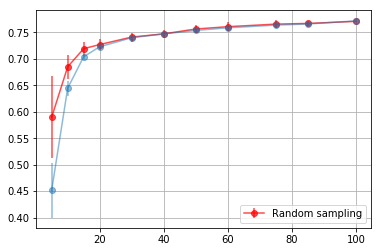

In [57]:
plot("Max degree sampling,","Max_sampling.jpg",results_to_lines(max_results,"Max"))